<a href="https://colab.research.google.com/github/Azamat2023/Data-science-and-AI/blob/master/18_CUSTOMER_CHURN_18_6_YAKUNIY_AMALIY_VAZIFA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**18-modul. Amaliyot. Customer Churn**
# 18.6. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifa orqali data sayns jarayoni:**

✔️ maʼlumot tayyorlash;

  ✔️ model qurish;

  ✔️ baholash;

  ✔️ natijalarni tahlil qilish
  kabi koʻnikmalarga ega boʻlasiz.

#**Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**

Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yarating:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblang:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlang.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.
---

###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [26]:
# Javobni shu yerda yozing.
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [28]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
encoded_col = LabelEncoder()
df['Geography'] = encoded_col.fit_transform(df['Geography'])
df['Gender'] = encoded_col.fit_transform(df['Gender'])

In [54]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
df['Surname'] = encoder.fit_transform(df[['Surname']])

In [61]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

In [62]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Logistic Regression

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.57      0.14      0.23       407

    accuracy                           0.80      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000

Model aniqligi: 0.8035


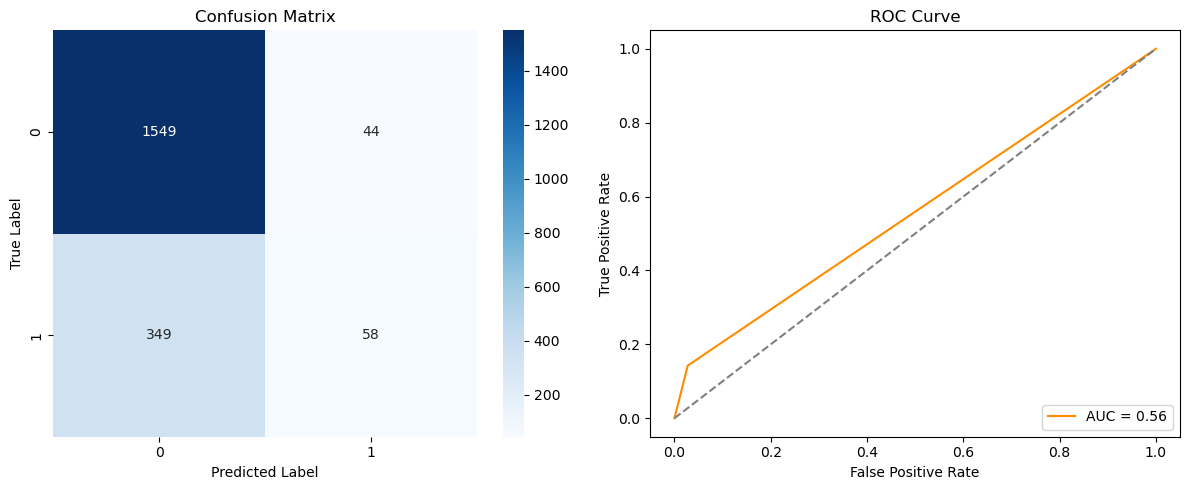

In [64]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# 1 qator, 2 ustunli figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# === 1-Grafik: Confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="g", ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# === 2-Grafik: ROC curve
axs[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1].set_title('ROC Curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')

# Chiroyli joylash uchun
plt.tight_layout()
plt.show()

Support Vector Machines

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.84      0.37      0.51       407

    accuracy                           0.86      2000
   macro avg       0.85      0.68      0.71      2000
weighted avg       0.86      0.86      0.83      2000

Model aniqligi: 0.8575


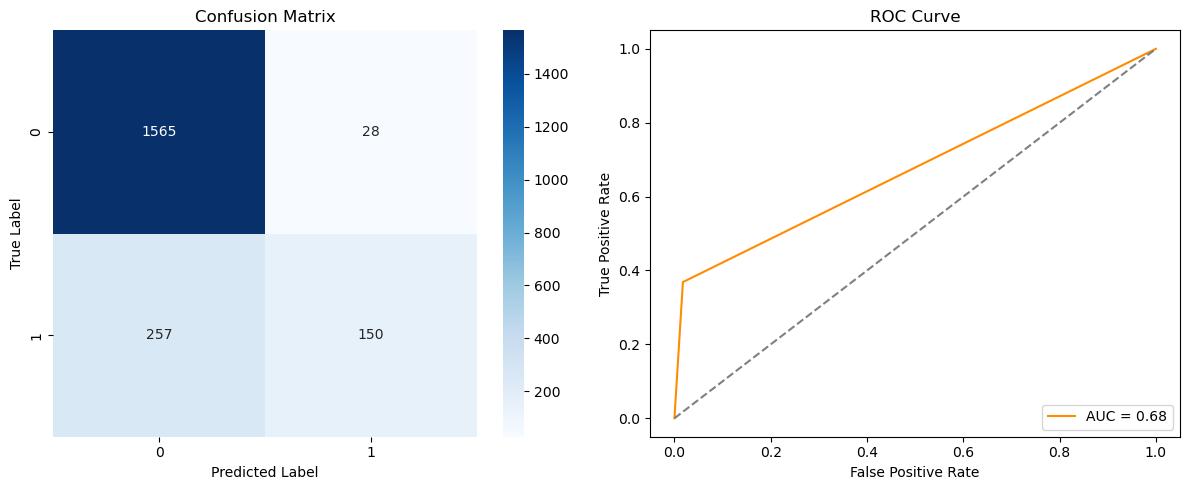

In [65]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# 1 qator, 2 ustunli figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# === 1-Grafik: Confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="g", ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# === 2-Grafik: ROC curve
axs[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1].set_title('ROC Curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')

# Chiroyli joylash uchun
plt.tight_layout()
plt.show()

Decision Tree

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1593
           1       0.46      0.49      0.48       407

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000

Model aniqligi: 0.7785


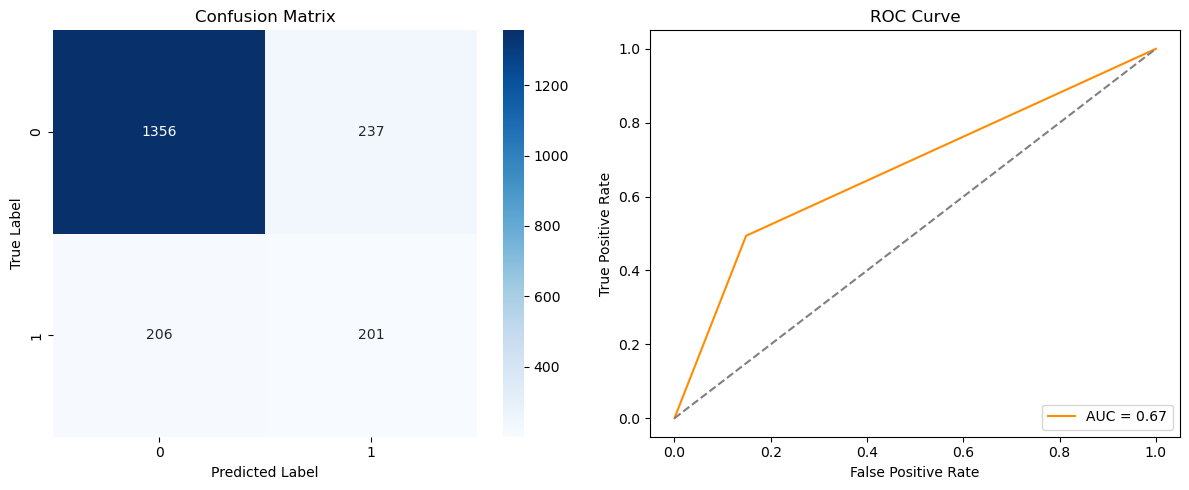

In [66]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# 1 qator, 2 ustunli figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# === 1-Grafik: Confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="g", ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# === 2-Grafik: ROC curve
axs[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1].set_title('ROC Curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')

# Chiroyli joylash uchun
plt.tight_layout()
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.69      0.45      0.55       407

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.83      0.85      0.83      2000

Model aniqligi: 0.8475


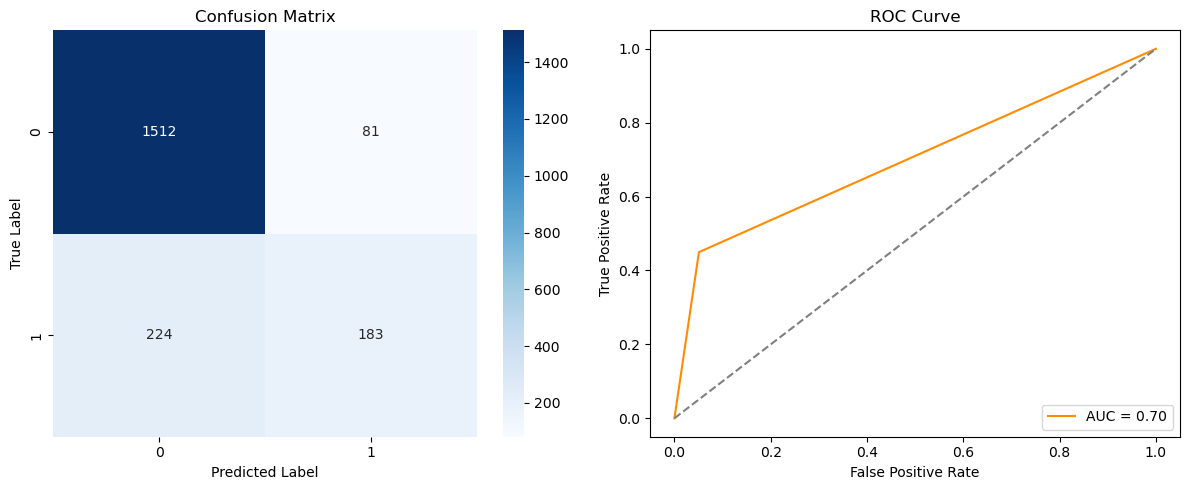

In [67]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# 1 qator, 2 ustunli figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# === 1-Grafik: Confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="g", ax=axs[0], cmap='Blues')
axs[0].set_title('Confusion Matrix')
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')

# === 2-Grafik: ROC curve
axs[1].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange')
axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs[1].set_title('ROC Curve')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')

# Chiroyli joylash uchun
plt.tight_layout()
plt.show()

In [ ]:
# Demak bizning dasturimizda "Support Vector Machines" va "Random Forest" Algoritmlari 
# to'liqbo'lmasa ham biroz yaxshinatija qaytarayapti qolgan algoritmlarga qaraganda
# yuqoridagi ikkisining ham ichidan "Support Vector Machines" yaxshiroq natija berayapti